# CSI-777 Homework 3

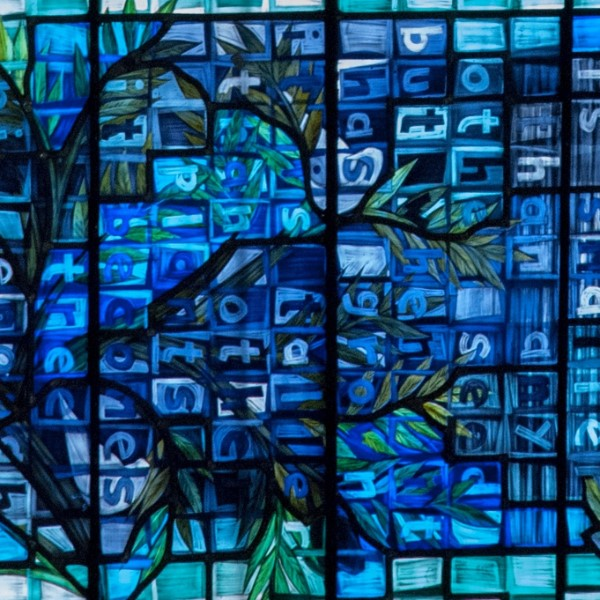

## Goal:

The overall goal for the third homework is to utilze the glass data set and perform kmeans clustering with 10-fold validation to determine glass type. The idea being that from the combination of elements clusters will form. 

## Background Research:

- There are plenty of different ways to perform kmeans. One could use R, Matlab, python etc...

- We will use Python with Sci-kit learn. Find more on that [here.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

## Methodology:

1) Import the glass data set and perform any needed cleaning.

2) Perform some basic EDA in order to see if any clusters might form.

3) Apply various models to try and predict type accurately.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('glass.csv')
df['Type'] = df['Type'].apply(lambda r: r.replace('\'', ''))
df.head()

,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build wind float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic wind float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build wind float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build wind non-float


## Visualize Correlations with the Data

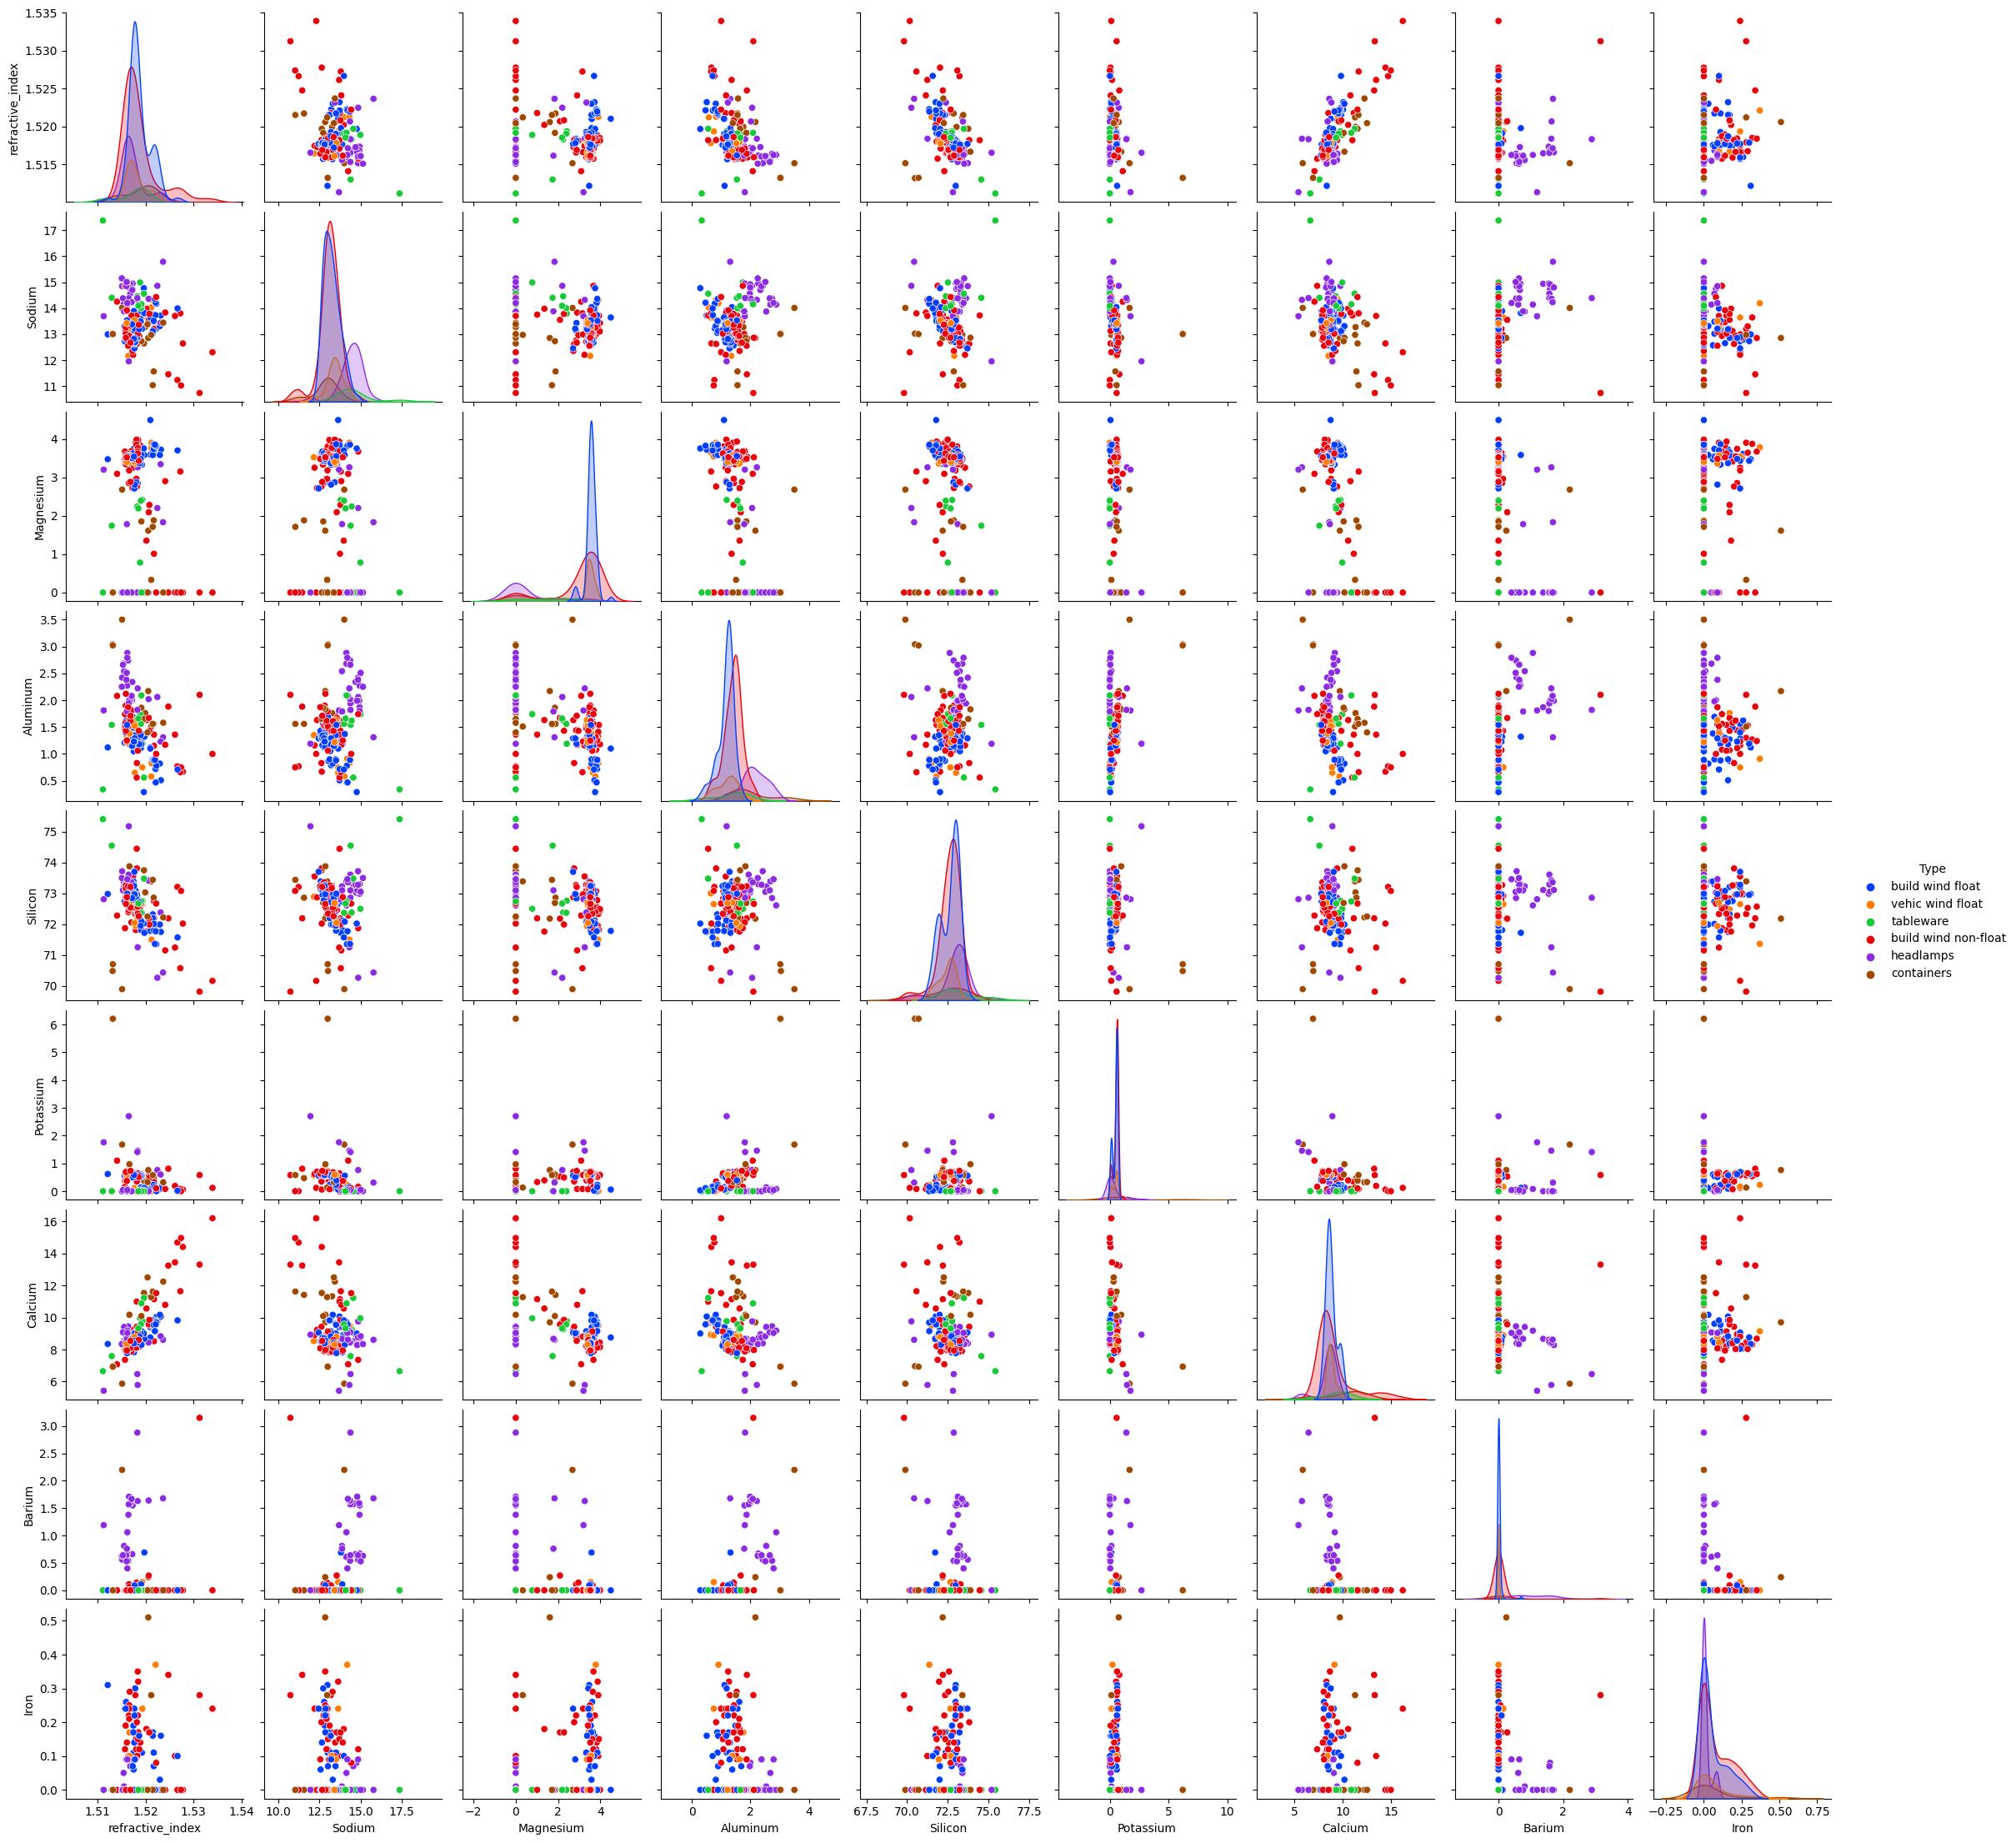

In [3]:
sns.pairplot(df, hue='Type', palette='bright')
plt.show()

## Play around with Visualizing PCA

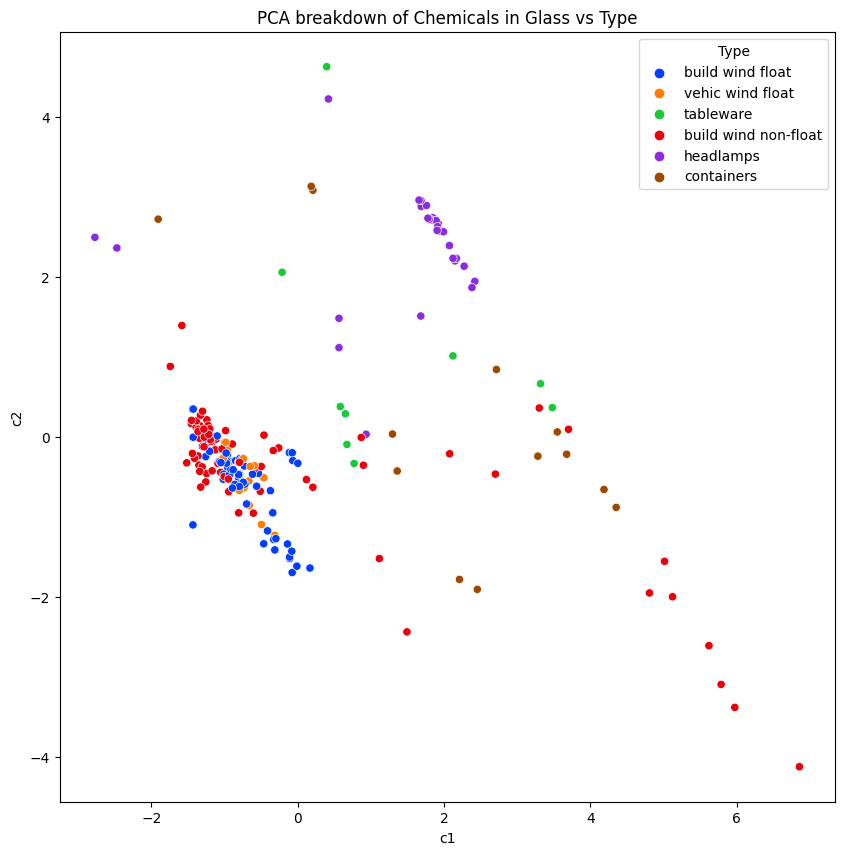

In [9]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
X = df.iloc[:,:-1].to_numpy()
y = df[['Type']].to_numpy()


fig = plt.figure(figsize=(10, 10))
plt.clf()

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

pcadf = pd.DataFrame(np.concatenate((X, y), axis=1))
pcadf.columns = ['c1', 'c2', 'Type']

plt.title("PCA breakdown of Chemicals in Glass vs Type")
sns.scatterplot(data=pcadf, x='c1', y='c2', hue='Type', palette='bright')
plt.show()

## Begin Work running K Means

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [11]:
df['Type'] = pd.Categorical(df['Type'])
X = df.iloc[:,:-1]
Y = df[['Type']]

In [16]:
acc = []
idx = []
stdev = []
cv = KFold(n_splits=10, random_state=1, shuffle=True)

for i in range(5):
    nc = i+1
    knn = KNeighborsClassifier(n_neighbors=nc).fit(X, Y)
    scores = cross_val_score(knn, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    acc.append(scores.mean())
    idx.append(nc)
    stdev.append(scores.std())

/home/nmaynard/miniconda3/envs/csi777/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nmaynard/miniconda3/envs/csi777/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nmaynard/miniconda3/envs/csi777/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/nmaynard/miniconda3/envs/csi777/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A col

### Metrics of Kmeans

After performing kmeans for classification we can see that no matter what, kmeans is more performant in terms of accuracy than a random dice throw (see the redline for base probability).

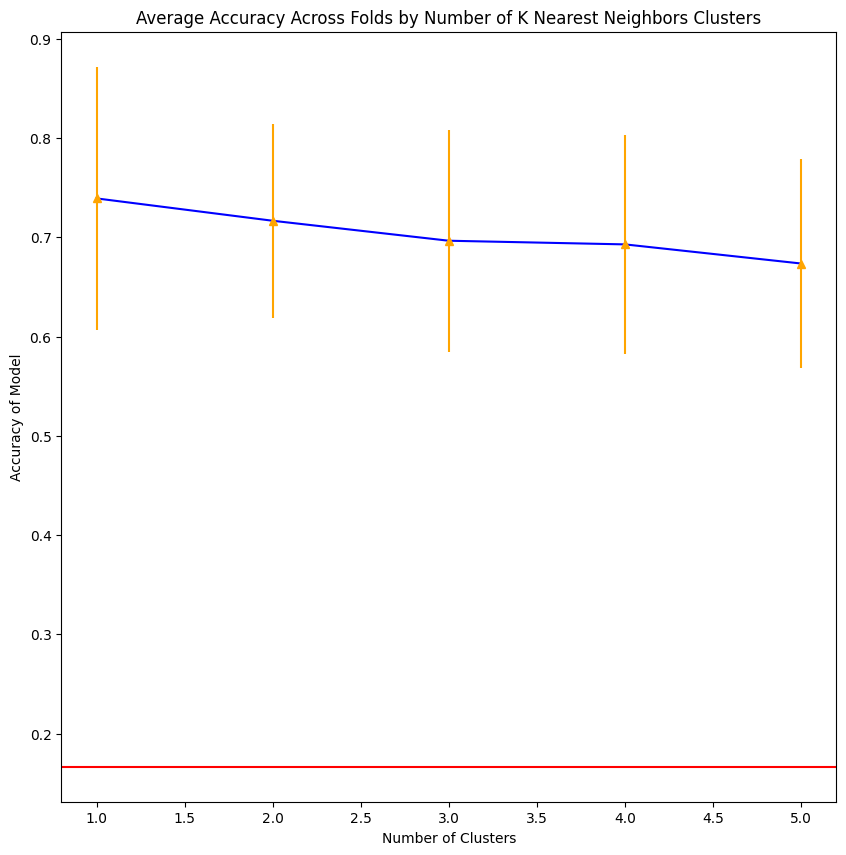

In [17]:
fig = plt.figure(figsize=(10,10))
plt.title("Average Accuracy Across Folds by Number of K Nearest Neighbors Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Accuracy of Model")
plt.axhline(1/len(set(df['Type'])), color='red')
plt.plot(idx, acc, color='blue')
plt.errorbar(idx, acc, stdev, linestyle='None', marker='^', color='orange')
plt.show()

## Interpreting Results

After running through our kmeans with 10 fold validation we can see that our accuracy in most cases is better than random, but our variability is large (orange bars are +- 1 standard deviation). KNN appears to do a fairly accurate job with 1 - 2 clusters seeming to be ideal.